<a href="https://colab.research.google.com/github/riyamarve/predictMyHealth/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#RIYA MARVE-21BDS0211

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [4]:
# Load the dataset
data = pd.read_csv('GSS7402.csv')

In [5]:
# 1. Exploring the Data
# Display dataset dimensions and summary
print("Dimensions:", data.shape)
print("\nSummary:\n", data.describe(include='all'))
print("\nMissing values:\n", data.isnull().sum())

Dimensions: (9120, 11)

Summary:
            rownames         kids          age    education         year  \
count   9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    4560.500000     2.076096    46.082018    12.635088  1990.288596   
std     2632.861561     1.805099    17.923889     2.955190     9.096915   
min        1.000000     0.000000    18.000000     0.000000  1974.000000   
25%     2280.750000     1.000000    31.000000    12.000000  1982.000000   
50%     4560.500000     2.000000    43.000000    12.000000  1994.000000   
75%     6840.250000     3.000000    59.000000    14.000000  1998.000000   
max     9120.000000     8.000000    89.000000    20.000000  2002.000000   

           siblings  agefirstbirth ethnicity city16 lowincome16 i

In [8]:
# 2. Data Transformation (Module 2)
# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data['agefirstbirth'] = imputer.fit_transform(data[['agefirstbirth']])

# Discretization and Binning
# Example: Binning age into categories
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 50, 75], labels=['Young', 'Middle-aged', 'Older'])

# Encoding categorical variables
label_enc = LabelEncoder()
data['ethnicity'] = label_enc.fit_transform(data['ethnicity'])
data['city16'] = label_enc.fit_transform(data['city16'])
data['lowincome16'] = label_enc.fit_transform(data['lowincome16'])
data['immigrant'] = label_enc.fit_transform(data['immigrant'])

data.head()

,rownames,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant,age_group
0,1,0,25,14,2002,1,22.630737,0,0,0,0,Young
1,2,1,30,13,2002,4,19.000000,0,1,0,0,Middle-aged
2,3,1,55,2,2002,1,27.000000,0,0,0,1,Older
3,4,2,57,16,2002,1,22.000000,0,0,0,0,Older
4,5,2,71,12,2002,6,29.000000,0,1,0,0,Older



Univariate Analysis (Age):
 count    9120.000000
mean       46.082018
std        17.923889
min        18.000000
25%        31.000000
50%        43.000000
75%        59.000000
max        89.000000
Name: age, dtype: float64


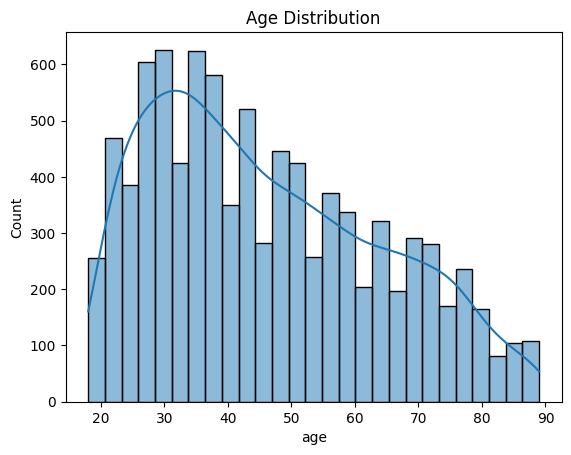

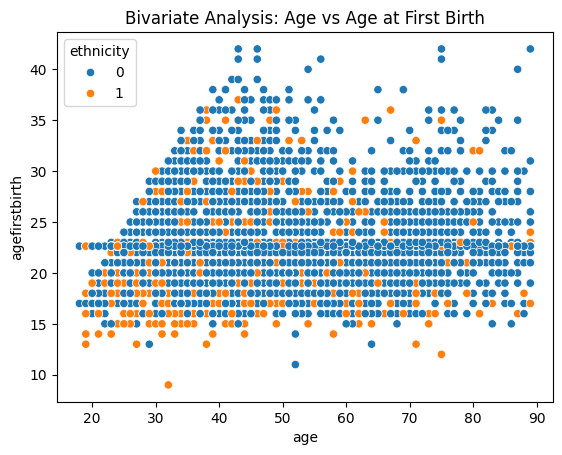

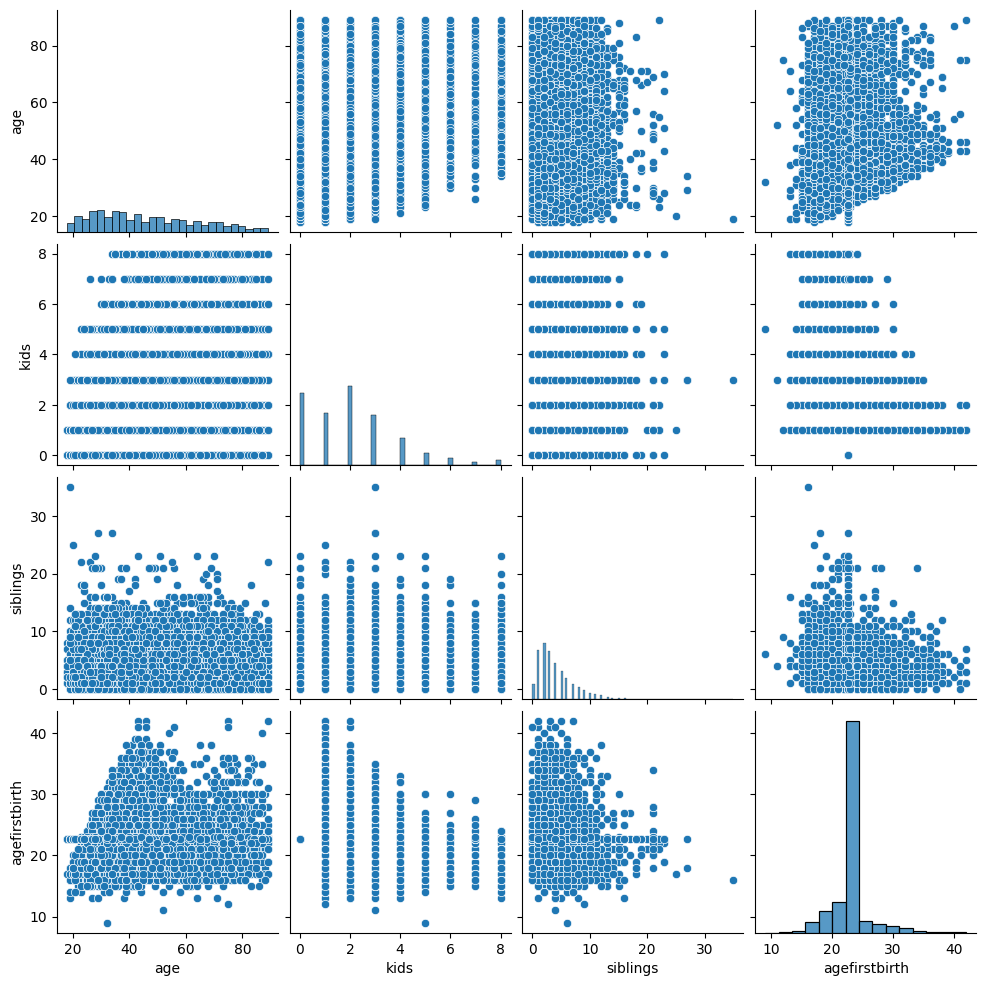

In [9]:
# 3. Univariate, Bivariate, and Multivariate Analysis (Module 3)
# Univariate Analysis
print("\nUnivariate Analysis (Age):\n", data['age'].describe())
sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Bivariate Analysis
sns.scatterplot(x='age', y='agefirstbirth', hue='ethnicity', data=data)
plt.title("Bivariate Analysis: Age vs Age at First Birth")
plt.show()

# Multivariate Analysis
sns.pairplot(data[['age', 'kids', 'siblings', 'agefirstbirth']])
plt.show()


Statistical Summary:
           rownames         kids          age    education         year  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean   4560.500000     2.076096    46.082018    12.635088  1990.288596   
std    2632.861561     1.805099    17.923889     2.955190     9.096915   
min       1.000000     0.000000    18.000000     0.000000  1974.000000   
25%    2280.750000     1.000000    31.000000    12.000000  1982.000000   
50%    4560.500000     2.000000    43.000000    12.000000  1994.000000   
75%    6840.250000     3.000000    59.000000    14.000000  1998.000000   
max    9120.000000     8.000000    89.000000    20.000000  2002.000000   

          siblings  agefirstbirth    ethnicity       city16  lowincome16  \
count  9120.000000    9120.000000  9120.000000  9120.000000  9120.000000   
mean      4.050658      22.630737     0.195724     0.424781     0.212500   
std       3.246137       2.928010     0.396779     0.494337     0.409099   
min   

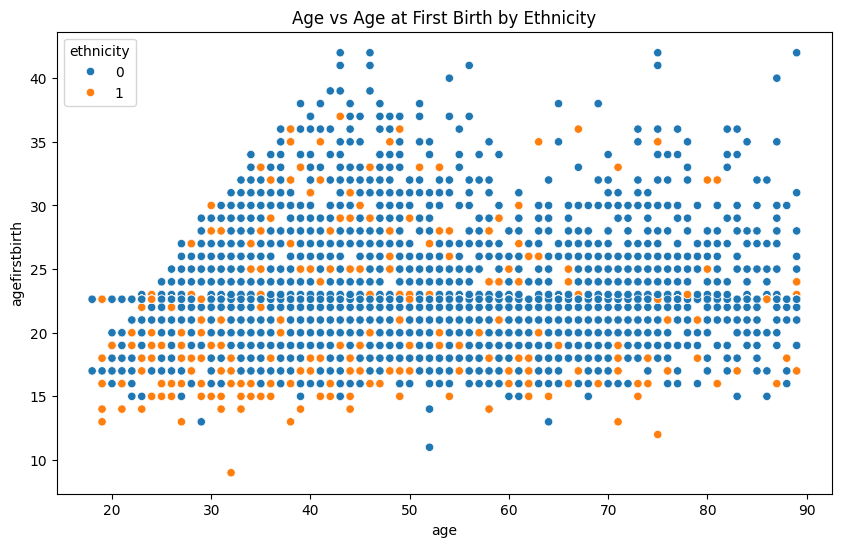

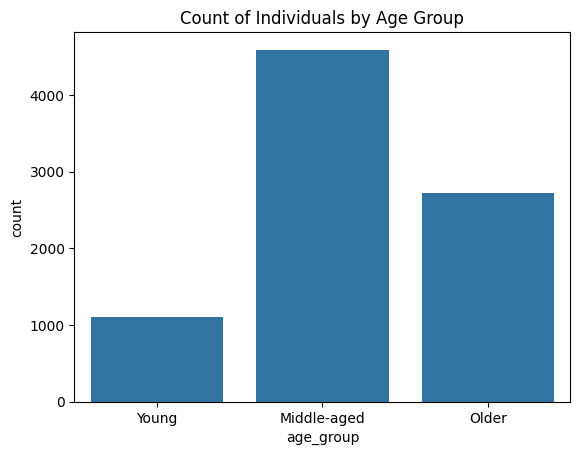

In [10]:
# 4. Data Summarization and Visualization (Module 4)
# Summarization with Statistical Summary
print("\nStatistical Summary:\n", data.describe())

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='agefirstbirth', hue='ethnicity')
plt.title("Age vs Age at First Birth by Ethnicity")
plt.show()

# Visualization: Bar Plot for Age Group
sns.countplot(x='age_group', data=data)
plt.title("Count of Individuals by Age Group")
plt.show()

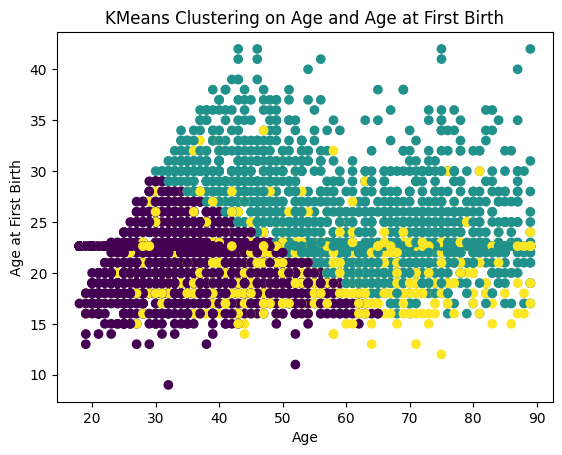

In [12]:
# 5. Clustering Algorithms (Module 5)
# Example with KMeans Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['age', 'siblings', 'agefirstbirth']])
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
data['cluster'] = kmeans.labels_

# Plot clusters
plt.scatter(data['age'], data['agefirstbirth'], c=data['cluster'], cmap='viridis')
plt.title("KMeans Clustering on Age and Age at First Birth")
plt.xlabel("Age")
plt.ylabel("Age at First Birth")
plt.show()


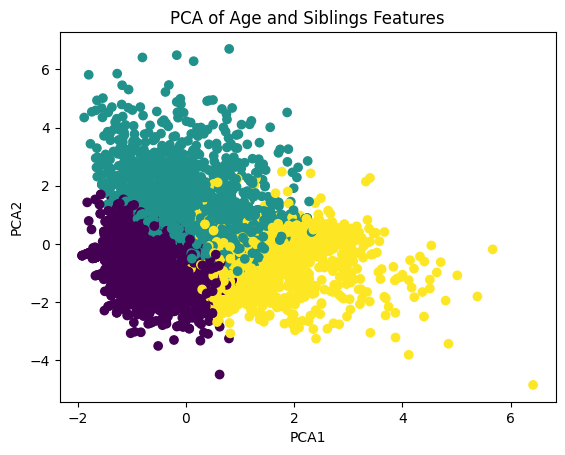

In [13]:
# 6. Dimensionality Reduction (Module 6)
# PCA Example
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'], data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

# Scatter plot of the principal components
plt.scatter(data['PCA1'], data['PCA2'], c=data['cluster'], cmap='viridis')
plt.title("PCA of Age and Siblings Features")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [15]:
# 7. Model Development and Evaluation (Module 7)
# Preparing data for linear regression model
X = data[['age', 'siblings', 'agefirstbirth']]
y = data['kids']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Constructing and evaluating the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 2.905918712747887
R-squared (R2) Score: 0.1479430020319702
